<a href="https://colab.research.google.com/github/Enoque12/Analise_TelecomX_Challenge2/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import requests
import pandas as pd
import json

In [2]:
url = 'https://raw.githubusercontent.com/Enoque12/Analise_TelecomX_Challenge2/refs/heads/main/Dados_API/TelecomX_Data.json'

In [3]:
dados = requests.get(url)

In [4]:
resultados = json.loads(dados.text)

In [5]:
df = pd.json_normalize(resultados)

In [6]:
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
colunas = df.columns
nomeColunasactual = ['customerID', 'Churn','gender', 'SeniorCitizen','Partner',
                     'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

In [8]:
for i in range(len(colunas)):
  df = df.rename(columns={colunas[i]:nomeColunasactual[i]})

In [9]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

##**Conhecendo o DataSet**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Acções necessárias:
- Verificar e remover duplicados
- Valores vazios
- Nulos
- Tipos de Dados
- Valores atipícos
- Consistencia e validez de dados categoricos
- Normalização de Textos

### Verificar e remover duplicados

In [11]:
print(f'A quantidade de valores duplicados no DF é: {df.duplicated().sum()}')

A quantidade de valores duplicados no DF é: 0


### Consistencia e validez de dados categoricos

In [12]:
colunas = df.columns

for col in colunas:
  print('---------------------------------------------')
  print(f'Os valores únicos da Coluna "{col}": \n{df[col].unique()}')
  print('---------------------------------------------')

---------------------------------------------
Os valores únicos da Coluna "customerID": 
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Churn": 
['No' 'Yes' '']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "gender": 
['Female' 'Male']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "SeniorCitizen": 
[0 1]
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Partner": 
['Yes' 'No']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Dependents": 
['Yes' 'No']
---------------------------------------------
---------------------------------------------
Os

### Somatório dos Vazios e nulos

In [13]:
for col in colunas:
  quantVazio = 0
  for valor in df[col]:
    if str(valor).strip() == '':
      quantVazio += 1
  if quantVazio > 0:
    print(f'A quantidade de valores vazios na Coluna "{col}" é: {quantVazio}')


A quantidade de valores vazios na Coluna "Churn" é: 224
A quantidade de valores vazios na Coluna "Charges.Total" é: 11


### Tornando os dados consistentes e normalizados

In [14]:
df_novo = df.copy()

In [15]:
df_novo['Churn'] = df_novo['Churn'].str.replace('NoNNooNo', 'No')

In [16]:
df_novo[df_novo['Charges.Total'].str.strip() == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


### Funções Auxiliares

In [17]:
def padronizaYesNo(df, coluna):
  df[coluna] = df[coluna].str.replace('Yes','1').replace('No','0')
  return df[coluna]

def converteParaInt(df, coluna):
  df[coluna] = df[coluna].astype(int)
  return df[coluna]

def colunasNoServe(df, colunas, tipoServico):
  df[coluna] = df[coluna].str.replace(tipoServico, 'No')
  return df[coluna]

def removeVazios(df, coluna):
  for i in range(len(df[coluna])):
    if str(df[coluna].iloc[i]).strip() == '':
      df[coluna][i] = 0
  return df[coluna]

### Tratando os Nulos/Vazios na Coluna Charges.Total

In [18]:
df_novo['Charges.Total'] = removeVazios(df_novo, 'Charges.Total')

/tmp/ipython-input-17-3012108758.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna][i] = 0
/tmp/ipython-input-17-3012108758.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna][i] = 0
/tmp/ipython-input-17-3012108758.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna][i] = 0
/tmp/ipython-input-17-3012108758.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

### Padronizando as colunas com o Valor "NoServe" para "No"

In [19]:
listaColunasNoServe = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
listaServicos = ['No phone service', 'No internet service']

for coluna in listaColunasNoServe:
  if coluna == 'MultipleLines':
    df_novo[coluna] = colunasNoServe(df_novo, coluna, listaServicos[0])
  else:
    df_novo[coluna] = colunasNoServe(df_novo, coluna, listaServicos[1])

In [20]:
df_novo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [21]:
colunas = df_novo.columns

for col in colunas:
  print('---------------------------------------------')
  print(f'Os valores únicos da Coluna "{col}": \n{df_novo[col].unique()}')
  print('---------------------------------------------')

---------------------------------------------
Os valores únicos da Coluna "customerID": 
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Churn": 
['No' 'Yes' '']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "gender": 
['Female' 'Male']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "SeniorCitizen": 
[0 1]
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Partner": 
['Yes' 'No']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Dependents": 
['Yes' 'No']
---------------------------------------------
---------------------------------------------
Os

In [22]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [24]:
df_novo['Charges.Total'] = df_novo['Charges.Total'].astype(float)

### Convertendo a coluna `Churn` para boolean

In [25]:
df_novo['Churn'] = padronizaYesNo(df_novo, 'Churn')

In [26]:
df_novo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Padronizando os Yes e No para 1 e 0

In [27]:
df_aux = df_novo.copy()

In [28]:
listaColunasPadronizadas = ['MultipleLines',
                            'OnlineSecurity',
                            'OnlineBackup',
                            'DeviceProtection',
                            'TechSupport',
                            'StreamingTV',
                            'StreamingMovies',
                            'Partner',
                            'Dependents',
                            'PhoneService',
                            'PaperlessBilling']

for coluna in listaColunasPadronizadas:
  df_novo[coluna] = padronizaYesNo(df_novo, coluna)

### Removendo os Vazios na Coluna Churn

In [29]:
df_novo['Churn'] = removeVazios(df_novo, 'Churn')

/tmp/ipython-input-17-3012108758.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[coluna][i] = 0
/tmp/ipython-input-17-3012108758.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [30]:
df_novo['Churn'] = df_novo['Churn'].astype(int)

### Convertendo para Int as colunas para facilitar a análise

In [31]:
for coluna in listaColunasPadronizadas:
  df_novo[coluna] = converteParaInt(df_novo, coluna)

In [32]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [33]:
df_novo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


### Renomeando e traduzindo as colunas do meu DataFrame

In [34]:
colunas_traduzidas = [
    'ID_Cliente',                # customerID
    'Evasao',                    # Churn
    'Genero',                    # gender
    'Idoso',                     # SeniorCitizen
    'Possui_Parceiro',           # Partner
    'Possui_Dependentes',        # Dependents
    'Meses_De_Contrato',         # tenure
    'Servico_Telefonico',        # PhoneService
    'Multiplas_Linhas',          # MultipleLines
    'Servico_Internet',          # InternetService
    'Seguranca_Online',          # OnlineSecurity
    'Backup_Online',             # OnlineBackup
    'Protecao_Dispositivo',      # DeviceProtection
    'Suporte_Tecnico',           # TechSupport
    'Streaming_TV',              # StreamingTV
    'Streaming_Filmes',          # StreamingMovies
    'Tipo_Contrato',             # Contract
    'Fatura_Papel',              # PaperlessBilling
    'Metodo_Pagamento',          # PaymentMethod
    'Gasto_Mensal',              # Charges.Monthly
    'Gasto_Total'                # Charges.Total
]

for i in range(len(colunas_traduzidas)):
  df_novo = df_novo.rename(columns={colunas[i]:colunas_traduzidas[i]})

In [35]:
df_novo

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_De_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


### Criando a coluna Contas Diárias

In [36]:
df_novo['Gasto_Diario'] = round(df_novo['Gasto_Mensal'] / 30, 2)

In [37]:
df_novo.head()

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_De_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


### Salvando os Dados num arquivo .json para futuras análises

In [38]:
df_novo.to_json('dados_tratados.json', index=False)

#📊 Carga e análise

## Análise descritiva

In [39]:
df_novo.describe()

,Evasao,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_De_Contrato,Servico_Telefonico,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Fatura_Papel,Gasto_Mensal,Gasto_Total,Gasto_Diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


## Distribuição da Evasão

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [41]:
df_novo['Evasao'].value_counts()

,count
Evasao,
0,5398
1,1869


Gráfico da Distribuição da Evasão

In [42]:
labels = ['Não Evasão','Evasão']
values = df_novo['Evasao'].value_counts()

# Create subplots: use 'domain' type for Pie subplot
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    pull=[0, 0.01],
    name="Distribuição da Evasão")])

# Use `hole` to create a donut-like pie chart
fig.update_traces(
    hole=.4,
    hoverinfo="label+percent")

fig.update_layout(
    title_text="Distribuição da Evasão",
    title_font_size=20,
    title_font_weight='bold',
    title_x=0.5,
    width=600,
    height=400,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Evasão',
                      x=0.5,
                      y=0.5,
                      font_size=20,
                      font_weight='bold',
                      showarrow=False,
                      xanchor="center")])

fig.show()

Com o seguinte gráfico conseguimos perceber que mais de 25,7% sairam da empresa e os 74,3% permanecem ainda na empresa. Essas percentagem correspondem a um número de 1869 clientes que sairam, em relação a um número de 5398 clientes que ainda permanecem na Empresa.

## Contagem de Evasão por Variáveis Categóricas

### Por gênero

In [43]:
quant_1s = df_novo.query('Evasao == 1').groupby('Genero').size().reset_index()

In [44]:
quant_0s = df_novo.query('Evasao == 0').groupby('Genero').size().reset_index()

In [45]:
distri_genero = pd.merge(quant_1s, quant_0s, on='Genero')

In [46]:
distri_genero.columns = ['Genero','Evasao','Não_Evasao']

In [47]:
distri_genero

,Genero,Evasao,Não_Evasao
0,Female,939,2653
1,Male,930,2745


In [48]:
distri_genero = distri_genero.melt(id_vars='Genero',
                  var_name='Status',
                  value_name='Contagem')

In [49]:
distri_genero

,Genero,Status,Contagem
0,Female,Evasao,939
1,Male,Evasao,930
2,Female,Não_Evasao,2653
3,Male,Não_Evasao,2745


Gráfico ilustrativo

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

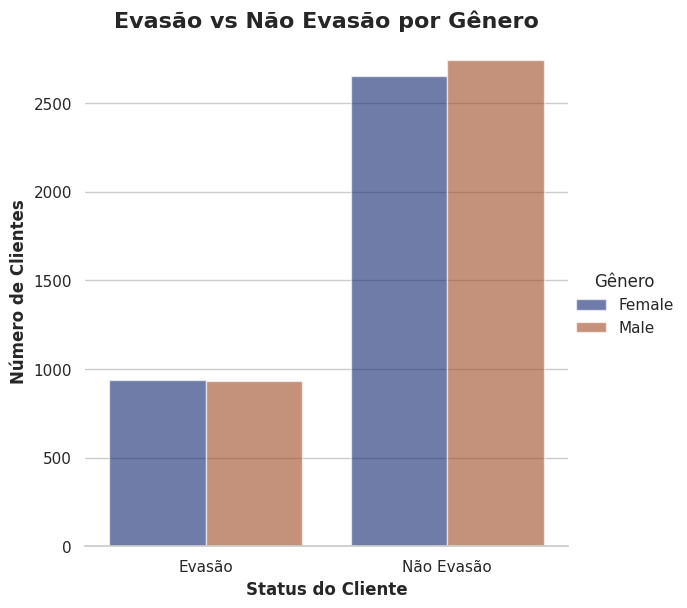

In [51]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=distri_genero,
    kind="bar",
    x='Status',
    y='Contagem',
    hue='Genero',
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6,
)

g.legend.set_title("Gênero")
g.despine(left=True)
g.set_axis_labels(
    "Status do Cliente",
    "Número de Clientes",
    fontweight='bold'
)
g.set_xticklabels(["Evasão", "Não Evasão"])
plt.title(
    'Evasão vs Não Evasão por Gênero',
    fontsize=16,
    fontweight='bold'
)


plt.show()

### Por Tipo de Contrato

In [52]:
df_novo.query('Evasao == 1').groupby(['Tipo_Contrato', 'Metodo_Pagamento']).size().reset_index()

,Tipo_Contrato,Metodo_Pagamento,0
0,Month-to-month,Bank transfer (automatic),201
1,Month-to-month,Credit card (automatic),178
2,Month-to-month,Electronic check,994
3,Month-to-month,Mailed check,282
4,One year,Bank transfer (automatic),38
5,One year,Credit card (automatic),41
6,One year,Electronic check,64
7,One year,Mailed check,23
8,Two year,Bank transfer (automatic),19
9,Two year,Credit card (automatic),13


In [53]:
pd.crosstab(df_novo['Tipo_Contrato'], df_novo['Evasao'])

Evasao,0,1
Tipo_Contrato,,
Month-to-month,2350,1655
One year,1353,166
Two year,1695,48


In [54]:
df_tipocontrato = pd.crosstab(df_novo['Tipo_Contrato'], df_novo['Evasao'])

In [55]:
df_tipocontrato = pd.crosstab(df_novo['Tipo_Contrato'], df_novo['Evasao']).reset_index()

In [56]:
df_tipocontrato.columns

Index(['Tipo_Contrato', 0, 1], dtype='object', name='Evasao')

In [57]:
df_tipocontrato.rename(columns={0:'Não_Evasao', 1:'Evasao'}, inplace=True)

In [58]:
df_tipocontrato_percentual = df_tipocontrato.copy()

In [59]:
df_tipocontrato = df_tipocontrato.melt(id_vars='Tipo_Contrato',
                  var_name='Status',
                  value_name='Contagem')

In [60]:
df_tipocontrato

,Tipo_Contrato,Status,Contagem
0,Month-to-month,Não_Evasao,2350
1,One year,Não_Evasao,1353
2,Two year,Não_Evasao,1695
3,Month-to-month,Evasao,1655
4,One year,Evasao,166
5,Two year,Evasao,48


Grafico ilustrativo

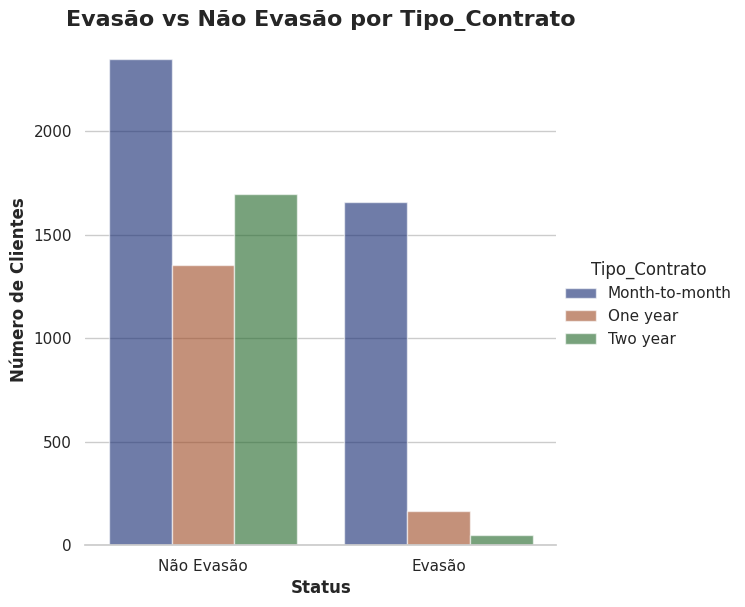

In [61]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_tipocontrato,
    kind="bar",
    x='Status',
    y='Contagem',
    hue='Tipo_Contrato',
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6,
)

g.legend.set_title("Tipo_Contrato")
g.despine(left=True)
g.set_axis_labels(
    "Status",
    "Número de Clientes",
    fontweight='bold'
)
g.set_xticklabels(["Não Evasão", "Evasão"])
plt.title(
    'Evasão vs Não Evasão por Tipo_Contrato',
    fontsize=16,
    fontweight='bold'
)


plt.show()

Com o seguinte gráfico conseguimos ver que a maioria das evasões quanto ao `Tipo de Contrato` está para os clientes com o `Tipo de contrato mês por mês` que por sinal a maior parte dos clientes possuem essse tipo de Contrato, diferente dos por ano ou dois anos, esses apresentam uma evasão muito baixa.

In [62]:
df_tipocontrato_percentual

Evasao,Tipo_Contrato,Não_Evasao,Evasao
0,Month-to-month,2350,1655
1,One year,1353,166
2,Two year,1695,48


In [63]:
df_tipocontrato_percentual['Percentagem'] = round(df_tipocontrato_percentual['Evasao'] / (df_tipocontrato_percentual['Evasao'] + df_tipocontrato_percentual['Não_Evasao']) * 100, 2)

In [64]:
df_tipocontrato_percentual

Evasao,Tipo_Contrato,Não_Evasao,Evasao,Percentagem
0,Month-to-month,2350,1655,41.32
1,One year,1353,166,10.93
2,Two year,1695,48,2.75


/tmp/ipython-input-65-4138856255.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




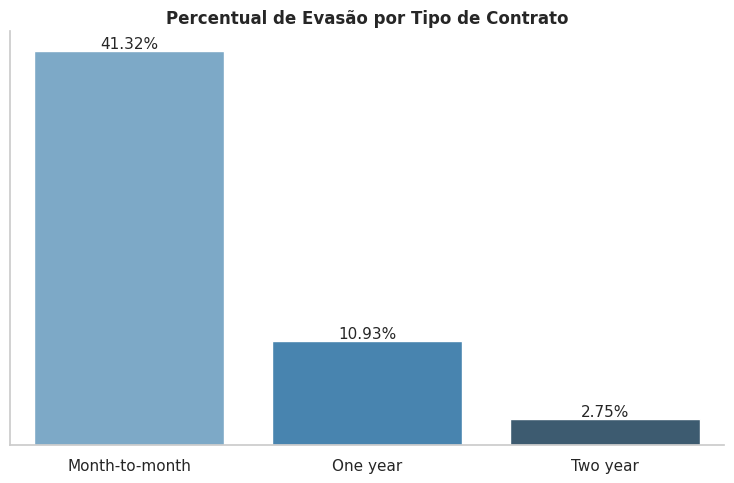

In [65]:
# Criar o catplot
g = sns.catplot(
    data=df_tipocontrato_percentual,
    x='Tipo_Contrato',
    y='Percentagem',
    kind='bar',
    palette='Blues_d',
    height=5,
    aspect=1.5
)

# Acessar o eixo principal para personalizar
ax = g.ax

# Remover o eixo Y
ax.set(yticks=[], ylabel='')

# Adicionar rótulos nas barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(
        f'{altura:.2f}%',
        (p.get_x() + p.get_width() / 2, altura),
        ha='center',
        va='bottom',
        fontsize=11
    )

# Título e ajustes
ax.set_title('Percentual de Evasão por Tipo de Contrato', fontweight='bold')
ax.set_xlabel('')
plt.tight_layout()
plt.show()

A análise dos dados de evasão por tipo de contrato revela um padrão claro de comportamento dos clientes da Telecom X:

Clientes com contratos mensais (Month-to-month) apresentam uma alta taxa de evasão (41,32%), representando o maior grupo entre os evasores. Isso indica que a flexibilidade oferecida por esse tipo de contrato pode facilitar a decisão de cancelamento por parte dos clientes.

Por outro lado, clientes com contrato de 1 ano e especialmente contrato de 2 anos apresentam taxas de evasão significativamente menores, com 10,93% e 2,75% respectivamente. Esses dados sugerem que contratos de maior duração estão associados a maior retenção de clientes.

Com base nesses resultados, conclui-se que a duração do contrato exerce forte influência na taxa de churn. Estratégias de fidelização, como incentivos para migração de clientes mensais para contratos anuais ou bienais, podem ser eficazes para reduzir significativamente a evasão de clientes.

### Por Metodo de Pagamento

In [66]:
pd.crosstab(df_novo['Metodo_Pagamento'], df_novo['Evasao'])

Evasao,0,1
Metodo_Pagamento,,
Bank transfer (automatic),1331,258
Credit card (automatic),1336,232
Electronic check,1374,1071
Mailed check,1357,308


In [67]:
df_tipoPagamento = pd.crosstab(df_novo['Metodo_Pagamento'], df_novo['Evasao']).reset_index()

In [68]:
df_tipoPagamento.rename(columns={0:'Não_Evasao', 1:'Evasao'}, inplace=True)

In [69]:
df_tipoPagamento_Perc = df_tipoPagamento.copy()

In [70]:
df_tipoPagamento = df_tipoPagamento.melt(id_vars='Metodo_Pagamento',
                  var_name='Status',
                  value_name='Contagem')

In [71]:
df_tipoPagamento

,Metodo_Pagamento,Status,Contagem
0,Bank transfer (automatic),Não_Evasao,1331
1,Credit card (automatic),Não_Evasao,1336
2,Electronic check,Não_Evasao,1374
3,Mailed check,Não_Evasao,1357
4,Bank transfer (automatic),Evasao,258
5,Credit card (automatic),Evasao,232
6,Electronic check,Evasao,1071
7,Mailed check,Evasao,308


Gráfico ilustrativo

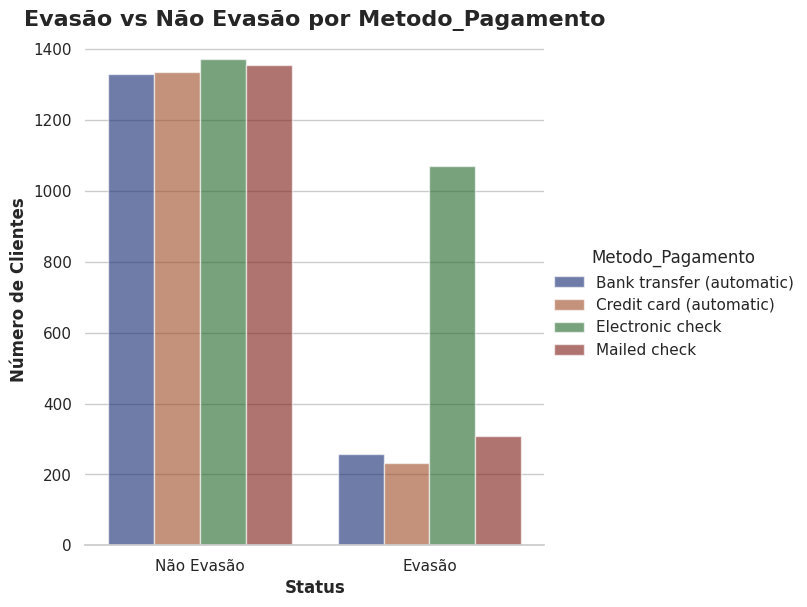

In [72]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_tipoPagamento,
    kind="bar",
    x='Status',
    y='Contagem',
    hue='Metodo_Pagamento',
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6,
)

g.legend.set_title("Metodo_Pagamento")
g.despine(left=True)
g.set_axis_labels(
    "Status",
    "Número de Clientes",
    fontweight='bold'
)
g.set_xticklabels(["Não Evasão", "Evasão"])
plt.title(
    'Evasão vs Não Evasão por Metodo_Pagamento',
    fontsize=16,
    fontweight='bold'
)


plt.show()

In [73]:
df_tipoPagamento_Perc['Percentagem'] = round(df_tipoPagamento_Perc['Evasao'] / (df_tipoPagamento_Perc['Evasao'] + df_tipoPagamento_Perc['Não_Evasao']) * 100, 2)

In [74]:
df_tipoPagamento_Perc

Evasao,Metodo_Pagamento,Não_Evasao,Evasao,Percentagem
0,Bank transfer (automatic),1331,258,16.24
1,Credit card (automatic),1336,232,14.80
2,Electronic check,1374,1071,43.80
3,Mailed check,1357,308,18.50


In [75]:
df_tipoPagamento_Perc

Evasao,Metodo_Pagamento,Não_Evasao,Evasao,Percentagem
0,Bank transfer (automatic),1331,258,16.24
1,Credit card (automatic),1336,232,14.80
2,Electronic check,1374,1071,43.80
3,Mailed check,1357,308,18.50


/tmp/ipython-input-114-2850524417.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-114-2850524417.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



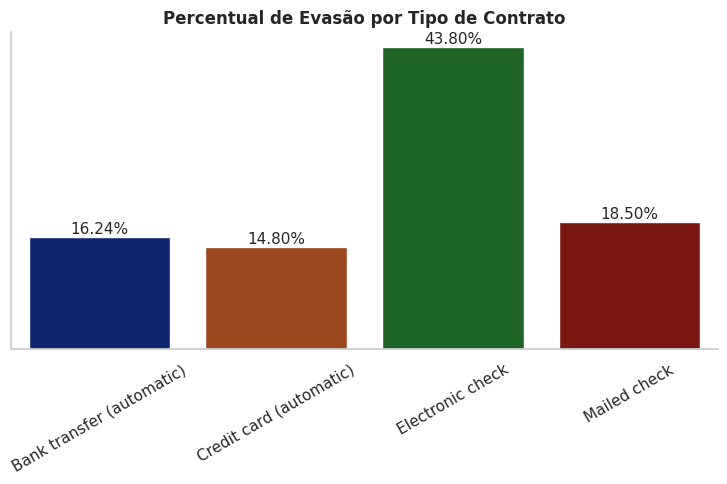

In [114]:
# Criar o catplot
g = sns.catplot(
    data=df_tipoPagamento_Perc,
    x='Metodo_Pagamento',
    y='Percentagem',
    kind='bar',
    palette='dark',
    height=5,
    aspect=1.5
)

#sns.color_palette("flare", as_cmap=True)
# Acessar o eixo principal para personalizar
ax = g.ax

# Remover o eixo Y
ax.set(yticks=[], ylabel='')

# Adicionar rótulos nas barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(
        f'{altura:.2f}%',
        (p.get_x() + p.get_width() / 2, altura),
        ha='center',
        va='bottom',
        fontsize=11
    )

# Título e ajustes
ax.set_title('Percentual de Evasão por Tipo de Contrato', fontweight='bold')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()

## Pelas Variáveis númericas

### Pelos Meses de Contrato

In [77]:
df_meses_contrato_evasao = df_novo.query('Evasao == 1').groupby('Meses_De_Contrato').size().reset_index()

In [78]:
df_meses_contrato_naoEvasao = df_novo.query('Evasao == 0').groupby('Meses_De_Contrato').size().reset_index()

In [79]:
df_meses_contrato = pd.merge(df_meses_contrato_evasao, df_meses_contrato_naoEvasao, on='Meses_De_Contrato')

In [80]:
df_meses_contrato.columns = ['Meses_De_Contrato','Evasao', 'Não_Evasao']

In [81]:
df_top10_meses = df_meses_contrato.head(10)

In [82]:
df_meses_contrato.head(10)

,Meses_De_Contrato,Evasao,Não_Evasao
0,1,380,254
1,2,123,123
2,3,94,113
3,4,83,102
4,5,64,74
5,6,40,75
6,7,51,85
7,8,42,88
8,9,46,79
9,10,45,73


In [83]:
# Transformar para formato longo
df_top10_meses = pd.melt(
    df_top10_meses,
    id_vars='Meses_De_Contrato',
    value_vars=['Evasao', 'Não_Evasao'],
    var_name='Status',
    value_name='Quantidade'
)

Gráfico ilustrativo dos 10 meses com maior número de Churn.

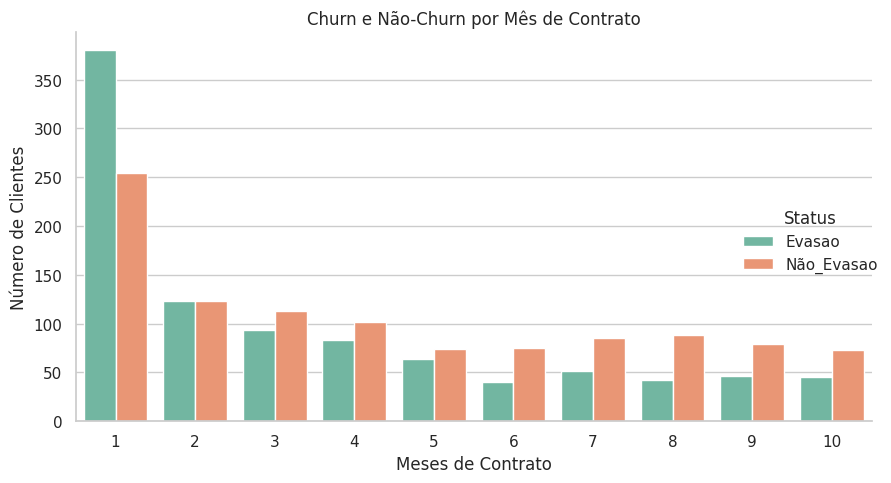

In [84]:
sns.catplot(
    data=df_top10_meses,
    x='Meses_De_Contrato',
    y='Quantidade',
    hue='Status',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1.5
)

plt.title('Churn e Não-Churn por Mês de Contrato')
plt.xlabel('Meses de Contrato')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()


**O que podemos concluir com o seguinte gráfico?**<br>


1.   A evasão(churn) ocorre muito mais no início do ciclo de contrato, especialmente no 1º mês.
2.   Com o tempo, há diminuição gradual nos casos de evasões(churn).
3.   Quanto maior o tempo de contrato, mais clientes permanecem.<br>

<hr>

A análise da variável Meses_Contrato mostra que a evasão de clientes é significativamente maior nos primeiros meses do contrato, especialmente no 1º mês. Isso indica uma fragilidade crítica na fase inicial do relacionamento com o cliente. A maioria dos cancelamentos ocorre entre o 1º e o 10º mês. Estratégias de retenção devem focar nos clientes que estão no início do ciclo contratual, especialmente no primeiro trimestre. Ao mesmo tempo, clientes com mais tempo de casa demonstram maior fidelidade, reforçando a importância de políticas de onboarding e engajamento precoce.









### Pelos Gastos totais

In [85]:
gastos_evasao = df_novo.query('Evasao == 1').groupby('Gasto_Total').size().reset_index()
gastos_nao_evasao = df_novo.query('Evasao == 0').groupby('Gasto_Total').size().reset_index()

In [86]:
df_gastosTotais = pd.merge(gastos_evasao, gastos_nao_evasao, on='Gasto_Total')

In [87]:
df_gastosTotais.columns = ['Gasto_Total','Evasao', 'Não_Evasao']

In [88]:
df_gastosTotais

,Gasto_Total,Evasao,Não_Evasao
0,18.85,1,1
1,19.10,1,2
2,19.25,1,3
3,19.30,2,2
4,19.40,1,3
...,...,...,...
221,6056.15,1,1
222,6215.35,1,1
223,6283.30,1,1
224,7548.10,1,1


In [89]:
# Criando Faixas
bins = [0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, df_gastosTotais['Gasto_Total'].max()]
labels = ['0-500', '500-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000+']
df_gastosTotais['Faixas'] = pd.cut(df_gastosTotais['Gasto_Total'], bins=bins, labels=labels)

In [90]:
df_gastosTotais

,Gasto_Total,Evasao,Não_Evasao,Faixas
0,18.85,1,1,0-500
1,19.10,1,2,0-500
2,19.25,1,3,0-500
3,19.30,2,2,0-500
4,19.40,1,3,0-500
...,...,...,...,...
221,6056.15,1,1,6000-7000
222,6215.35,1,1,6000-7000
223,6283.30,1,1,6000-7000
224,7548.10,1,1,7000+


In [91]:
df_gastos_Faixas = df_gastosTotais.melt(
    id_vars='Faixas',
    value_vars=['Evasao', 'Não_Evasao'],
    var_name='Status',
    value_name='Quantidade'
)

# Agrupar por faixa e status para somar os valores
df_gastos_Faixas = df_gastos_Faixas.groupby(['Faixas', 'Status']).sum().reset_index()

/tmp/ipython-input-91-2851396949.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



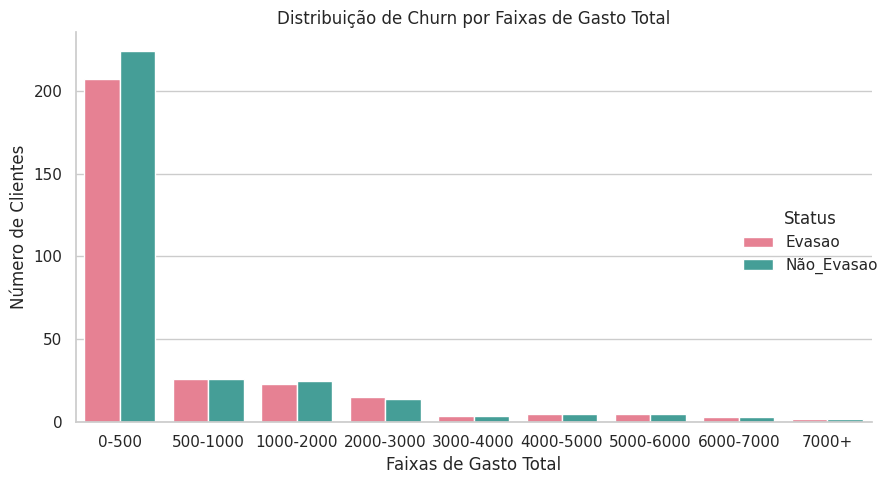

In [92]:
# Plotando com catplot
sns.set(style='whitegrid')
g = sns.catplot(
    data=df_gastos_Faixas,
    x='Faixas',
    y='Quantidade',
    hue='Status',
    kind='bar',
    palette='husl',
    height=5,
    aspect=1.5
)

plt.title('Distribuição de Churn por Faixas de Gasto Total')
plt.xlabel('Faixas de Gasto Total')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

In [93]:
df_novo.head()

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_De_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


# Extra

## Relação entre a conta diária e a Evasão

In [94]:
df_diario = df_novo[['Evasao', 'Gasto_Diario']]

In [95]:
df_diario.corr()

,Evasao,Gasto_Diario
Evasao,1.000000,0.189918
Gasto_Diario,0.189918,1.000000


/tmp/ipython-input-96-2778101709.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




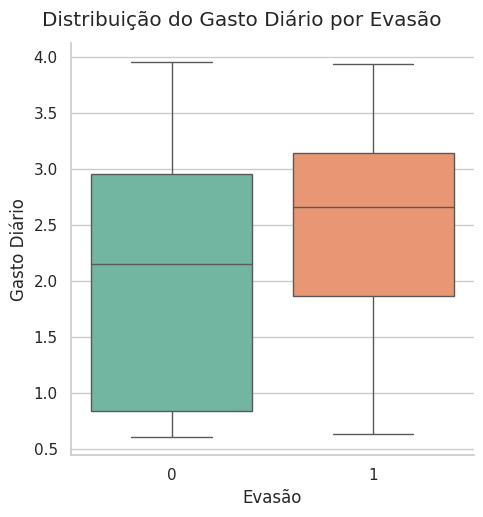

In [96]:
sns.set(style="whitegrid")
g = sns.catplot(
    data=df_diario,
    x='Evasao',
    y='Gasto_Diario',
    kind='box',
    height=5,
    aspect=1,
    palette='Set2'
)

g.set_axis_labels("Evasão", "Gasto Diário")
g.fig.suptitle("Distribuição do Gasto Diário por Evasão", y=1.03)

plt.show()

**✅ Interpretação e insights**

**Clientes que evadiram (Evasao = 1) tendem a ter**:

*   Uma mediana de gasto diário mais alta do que os que não evadiram.
*   Isso pode indicar que clientes com gastos maiores estão mais propensos a cancelar, talvez por sentirem que não estão tendo retorno ou consideram caro demais.

**Clientes que não evadiram (Evasao = 0) têm**:

*   Gasto diário mais variado, com muitos valores mais baixos.
*   Isso pode indicar que clientes com planos mais econômicos ou menor uso permanecem mais.

**A dispersão dos dados entre os dois grupos é diferente**:

- Não Evasão tem uma dispersão maior, incluindo clientes que gastam muito pouco e alguns que gastam muito.

- Evasão é mais concentrada em gastos médios a altos.

In [97]:
# 1. Criar faixas de gasto (ajuste os limites conforme os dados)
bins = [0, 1, 2, 3, df_diario['Gasto_Diario'].max()]
labels = ['0–1', '1–2', '2–3', '3+']
df_diario['Faixa_Gasto'] = pd.cut(df_diario['Gasto_Diario'], bins=bins, labels=labels, right=False)

/tmp/ipython-input-97-377575036.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
# 2. Agrupar por faixa e contar evasão/não evasão
tabela = df_diario.groupby(['Faixa_Gasto', 'Evasao']).size().unstack().fillna(0).reset_index()
tabela.columns = ['Faixa_Gasto', 'Nao_Evasao', 'Evasao']  # 0: não evadiram, 1: evadiram

/tmp/ipython-input-98-4241700897.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [99]:
# 3. Reorganizar os dados no formato longo
tabela_melt = pd.melt(tabela, id_vars='Faixa_Gasto', value_vars=['Nao_Evasao', 'Evasao'],
                      var_name='Tipo', value_name='Contagem')

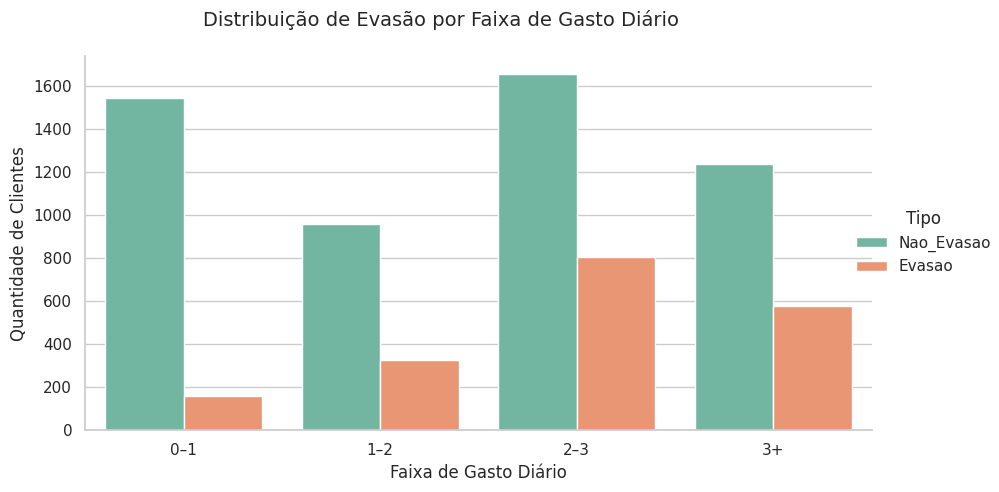

In [100]:
# 4. Plotar gráfico com catplot
sns.set(style="whitegrid")
g = sns.catplot(
    data=tabela_melt,
    kind="bar",
    x="Faixa_Gasto",
    y="Contagem",
    hue="Tipo",
    palette="Set2",
    height=5,
    aspect=1.5
)

g.set_axis_labels("Faixa de Gasto Diário", "Quantidade de Clientes")
g.fig.suptitle("Distribuição de Evasão por Faixa de Gasto Diário", fontsize=14)

# Reposicionando a legenda
g._legend.set_title("Tipo")
g._legend.set_bbox_to_anchor((1.12, 0.5))  # Afastando para a direita
plt.tight_layout()
plt.show()

📊 **Interpretação do gráfico**<br>

🟩 **Faixa 0–1**

*   Alta quantidade de clientes que permanecem (Não_Evasao)
*   Pouquíssima evasão

 **Insight**: Clientes que gastam pouco tendem a permanecer mais. Pode ser que sejam usuários mais cautelosos ou que não exigem muito do serviço.

🟨 **Faixa 1–2**

*   A evasão começa a subir gradualmente, enquanto a permanência diminui

  **Insight**: Clientes que aumentam o gasto normalmente podem estar testando mais o serviço, mas nem todos veem valor suficiente para continuar, resultando em maior evasão.

🟥 **Faixa 2–3**

*   Maior número de evasões
*   Número de permanências ainda é alto, mas proporcionalmente, a taxa de churn está mais elevada

  **Insight importante**: Essa pode ser a faixa crítica — clientes que gastam mais e esperam retorno proporcional. Quando isso não acontece, abandonam o serviço.

🟦 **Faixa 3+ (maiores gastos)**

*   Número de evasões reduz novamente

  **Insight**: Clientes que gastam mais talvez sejam usuários fiéis, clientes premium ou tenham maior dependência do serviço. Isso reduz a chance de churn.







## Como quantidade de serviços contratados afeta a probabilidade de churn

In [101]:
df_novo.columns

Index(['ID_Cliente', 'Evasao', 'Genero', 'Idoso', 'Possui_Parceiro',
       'Possui_Dependentes', 'Meses_De_Contrato', 'Servico_Telefonico',
       'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Papel',
       'Metodo_Pagamento', 'Gasto_Mensal', 'Gasto_Total', 'Gasto_Diario'],
      dtype='object')

In [102]:
clunasServicos = ['Evasao', 'Servico_Telefonico',
       'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes']

In [103]:
df_servicos = df_novo[clunasServicos]

In [104]:
df_servicos.head()

,Evasao,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes
0,0,1,0,DSL,0,1,0,1,1,0
1,0,1,1,DSL,0,0,0,0,0,1
2,1,1,0,Fiber optic,0,0,1,0,0,0
3,1,1,0,Fiber optic,0,1,1,0,1,1
4,1,1,0,Fiber optic,0,0,0,1,1,0


In [105]:
df_servicos.drop(columns='Servico_Internet', axis=1, inplace=True)

/tmp/ipython-input-105-1451766926.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
df_servicos.corr()

,Evasao,Servico_Telefonico,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes
Evasao,1.000000,0.012571,0.039343,-0.166828,-0.080163,-0.063452,-0.160440,0.062430,0.060586
Servico_Telefonico,0.012571,1.000000,0.280379,-0.093341,-0.052165,-0.073033,-0.097573,-0.025362,-0.034345
Multiplas_Linhas,0.039343,0.280379,1.000000,0.098396,0.205156,0.202172,0.098053,0.257405,0.259268
Seguranca_Online,-0.166828,-0.093341,0.098396,1.000000,0.286432,0.275699,0.356113,0.177332,0.189881
Backup_Online,-0.080163,-0.052165,0.205156,0.286432,1.000000,0.306665,0.292422,0.283195,0.276788
Protecao_Dispositivo,-0.063452,-0.073033,0.202172,0.275699,0.306665,1.000000,0.332267,0.394421,0.402720
Suporte_Tecnico,-0.160440,-0.097573,0.098053,0.356113,0.292422,0.332267,1.000000,0.278376,0.280058
Streaming_TV,0.062430,-0.025362,0.257405,0.177332,0.283195,0.394421,0.278376,1.000000,0.531336
Streaming_Filmes,0.060586,-0.034345,0.259268,0.189881,0.276788,0.402720,0.280058,0.531336,1.000000


In [107]:
df_serv_cor = df_servicos.corr()

In [108]:
df_serv_cor = df_serv_cor.reset_index()

In [109]:
listaCor = list(df_serv_cor['Evasao'])
listaCor = [round(x, 4) for x in listaCor]
listaCor = listaCor[1:]

In [110]:
listaCor

[0.0126, 0.0393, -0.1668, -0.0802, -0.0635, -0.1604, 0.0624, 0.0606]

In [111]:
listaServicos = df_serv_cor.columns
listaServicos = list(listaServicos[2:])

In [112]:
df_correlacao = pd.DataFrame({'Serviço': listaServicos, 'Correlação': listaCor})

Plotando o Gráfico

/tmp/ipython-input-113-678379865.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




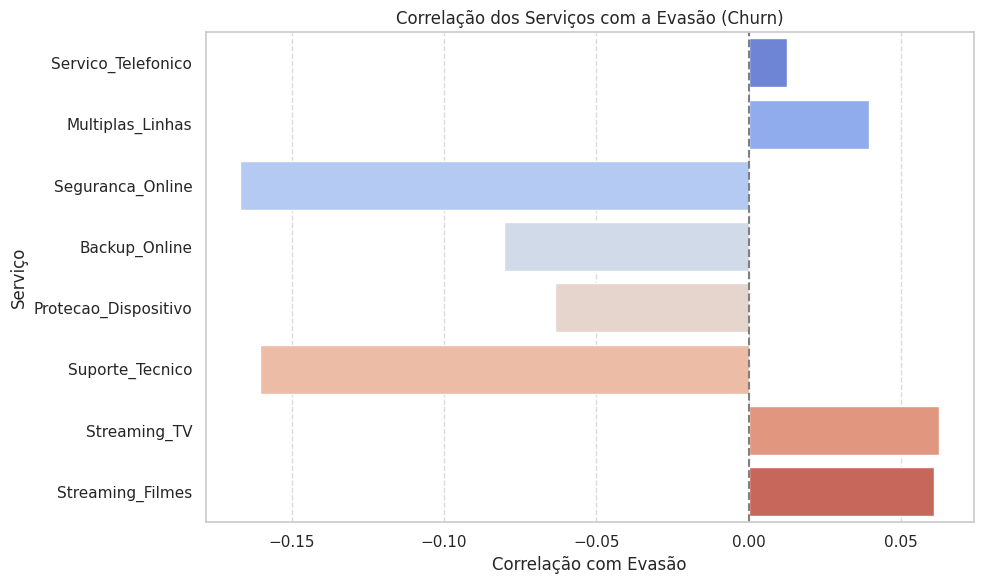

In [113]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_correlacao, y='Serviço', x='Correlação', palette='coolwarm', orient='h')
plt.title('Correlação dos Serviços com a Evasão (Churn)')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Correlação com Evasão')
plt.ylabel('Serviço')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

📊 **Interpretação da Correlação**

*   **Correlação positiva**: indica que clientes que usam o serviço têm maior probabilidade de evasão.
*  **Correlação negativa**: indica que clientes que usam o serviço têm menor probabilidade de evasão.
*   Valores próximos de 0 indicam correlação fraca ou inexistente.<br>

📉 **Serviços com correlação negativa (menor risco de churn)**

*   **Segurança Online**: -0.167 -> Clientes que usam esse serviço tendem a ficar mais.
*   **Suporte Técnico**: -0.160 -> Ter suporte técnico disponível reduz a evasão.
*   **Backup Online**: -0.080 -> Também associado a menor evasão.
*   **Proteção de Dispositivo**: -0.063 -> Leve tendência de retenção de clientes.<br>

Esses serviços parecem agregar valor percebido, o que reduz o churn.

📈 **Serviços com correlação positiva (maior risco de churn)**

*   **Múltiplas Linhas**: +0.039
*   **Streaming TV**: +0.062
*   **Streaming de Filmes**: +0.061

Leve associação com maior evasão, possivelmente por baixa percepção de valor ou custo elevado.

⚠️ **Serviços com correlação neutra**
*   **Serviço Telefônico**: +0.013 -> Praticamente sem influência significativa sobre o churn.













#📄Relatorio Final

  <h1> <strong>Telecom X - análise de evasão de clientes </strong></h1>

## **Introdução**

A Telecom X é uma empresa do setor de telecomunicações que vem enfrentando um alto índice de evasão de clientes nos últimos meses. Apesar dos esforços internos, a empresa ainda não conseguiu identificar com clareza os motivos por trás desse fenômeno.

Para apoiar na resolução desse problema, fui contratado como Assistente de Análise de Dados para fazer parte da equipe de Data Science da empresa. Minha principal responsabilidade será buscar, tratar e realizar uma análise exploratória dos dados dos clientes da Telecom X.

O objetivo desta análise é identificar os principais fatores que influenciam o Churn (cancelamento de serviço), fornecendo insights que auxiliem na definição de estratégias para retenção de clientes. A análise será conduzida com base em um conjunto de dados internos da empresa e contará com o uso de ferramentas analíticas como Python, Pandas e bibliotecas de visualização.

## **Limpeza e Tratamento de Dados**

**Para importar os Dados**

Para realizar a importação dos dados da Telecom X, utilizei três bibliotecas principais do ecossistema Python::

- `requests`: Utilizada para acessar os dados a partir de uma URL fornecida pela empresa. Por meio do método `requests.get(url)`, foi possível realizar uma requisição HTTP para obter os dados brutos diretamente da API da Telecom X.

- `json `: Os dados obtidos estavam em formato JSON aninhado `(nested JSON)`, o que dificultava a visualização direta em forma de tabela. Para resolver isso, utilizei o método `json.loads(resposta.text)` que converte a resposta em um dicionário Python manipulável.

- `pandas`: Após o carregamento dos dados, usei o método `pd.json_normalize(resultado)` da biblioteca pandas para "desanilhar" o JSON, transformando-o em um DataFrame tabular com colunas bem definidas, pronto para ser utilizado nas próximas etapas da análise.   

**Limpeza dos Dados**

Durante o processo de limpeza dos dados, foram realizadas diversas etapas fundamentais para garantir a integridade e a qualidade do conjunto de dados da Telecom X. Abaixo, descrevo as ações executadas:

- **Verificação e Remoção de Duplicados**:

  Iniciei verificando se existiam registros duplicados no dataset. Para isso, utilizei o método `duplicated().sum()`, que retorna a quantidade de linhas duplicadas. Como o resultado foi zero, nenhuma remoção foi necessária, e a análise prosseguiu para a próxima etapa.


- **Verificação de Valores Únicos por Coluna**

  Para compreender a estrutura dos dados e identificar possíveis anomalias, percorri todas as colunas com um laço for e utilizei o método `.unique()` para verificar os valores únicos de cada uma. Durante essa análise, foi possível identificar valores vazios não convencionais — ou seja, campos com espaços em branco ou strings vazias `("")`, que não seriam detectados com o método `isna().`

- **Identificação de Colunas com Dados Vazios**:

  As colunas que apresentaram dados vazios foram:

  - `"Churn"` (informando se o cliente cancelou ou não o serviço)
  - `"TotalCharges"` (Gasto total)

- **Tratamento dos Dados Vazios:**

  Para resolver os dados ausentes, desenvolvi uma função auxiliar chamada `removeVazios()`, que recebe o DataFrame e o nome da coluna como parâmetros. A função percorre os valores da coluna, identifica as entradas vazias (após conversão para str e uso do método `.strip()`), e as substitui por 0. Essa abordagem foi aplicada especialmente à coluna "TotalCharges".

- **Tratamento de Colunas com Valor "No service"**

  Algumas colunas de serviço apresentavam o valor `"No service"` além dos valores `"Yes" e "No"`, o que dificultava a padronização. Para uniformizar os dados, criei uma função auxiliar chamada `colunasNoServe()` que, ao receber o DataFrame, o nome da coluna e o tipo de serviço, substitui `"No service" por "No"` usando o método `.replace()`.

- **Padronização dos Valores "Yes" e "No"**

  Para facilitar as análises, decidi transformar os valores `"Yes" e "No"` para valores numéricos `(1 e 0, respectivamente)`. Criei uma lista com os nomes das colunas afetadas e, por meio de um for, apliquei a função `padronizaYesNo()`, que realiza a substituição diretamente com o `.replace()`.

- **Conversão para Tipo Numérico**

  Após a padronização, as colunas contendo `"1"` e `"0"` foram convertidas para o tipo inteiro `(int)` com a função `converteParaInt()`, que utiliza o método `.astype(int)`. Esse procedimento também foi realizado nas colunas financeiras como "MonthlyCharges" e "TotalCharges" para garantir que fossem tratadas como variáveis numéricas.

- **Tradução dos Nomes das Colunas**

  Para facilitar a compreensão do conjunto de dados durante a análise e visualização, traduzi os nomes das colunas para o português. Para isso, criei uma lista com os novos nomes e atribuí diretamente ao atributo `df.columns`, substituindo os títulos originais.

- Criação da Coluna de Gastos_Diarios

  Atendendo à recomendação do desafio, foi criada uma nova coluna chamada Gastos_Diarios com o objetivo de estimar o valor médio gasto por cliente por dia.
  A criação da coluna foi feita a partir da divisão da coluna Gasto_Mensal por 30, considerando uma média de 30 dias por mês. A operação foi realizada diretamente no DataFrame com a seguinte fórmula:

  ```
  df['Gastos_Diarios'] = df['Gasto_Mensal'] / 30
  ```
  Essa nova variável auxilia na compreensão mais granular dos hábitos de consumo dos clientes e poderá ser útil em análises futuras, como segmentações ou identificação de padrões de churn relacionados ao custo diário.


## **Análise Exploratória de Dados**

### **Distribuição da Evasão**

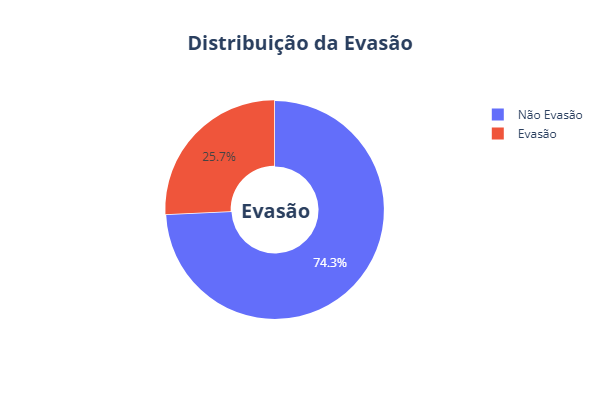

**📊 Análise do Gráfico: Distribuição da Evasão**

- 25,7% dos clientes cancelaram o serviço (Evasão)

- 74,3% dos clientes permaneceram na empresa (Não Evasão)

Esse gráfico mostra que aproximadamente 1 em cada 4 clientes abandona os serviços da Telecom X.

Embora a maioria dos clientes permaneça ativa, a taxa de churn de 25,7% é consideravelmente alta no setor de telecomunicações - onde, em muitos mercados, uma taxa de churn acima de 10~15% já acende um alerta de retenção.


**Insights Identificados**

- Churn significativo: Uma em cada quatro pessoas está saindo da base de clientes. Isso representa um custo elevado, já que reter um cliente costuma ser mais barato do que adquirir um novo.

- Oportunidade de fidelização: Com mais de 70% da base ainda ativa, a empresa tem uma boa oportunidade de trabalhar estratégias preventivas com quem já é cliente, antes que também decida cancelar.

### **Análise da Evasão pelas Variáveis Categóricas**

#### **Por Gênero**

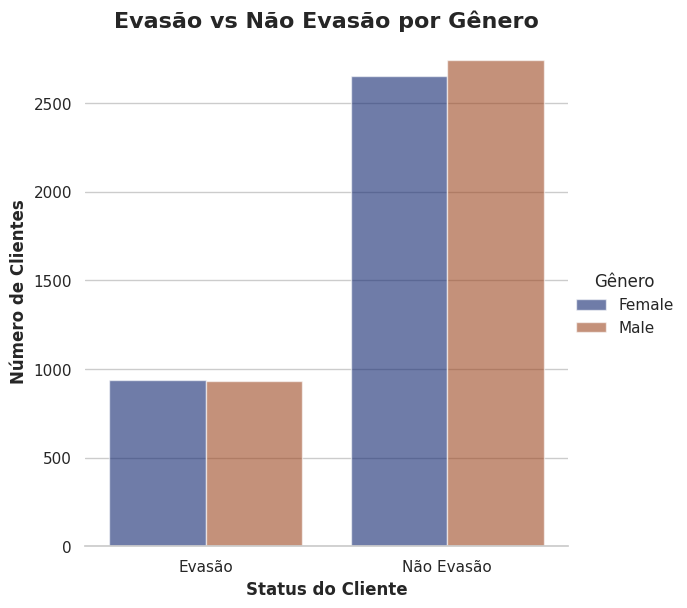

**📊 Análise do Gráfico: Evasão vs Não Evasão por Gênero**

Este gráfico de barras compara a quantidade de clientes que cancelaram (evasão) e não cancelaram (não evasão) o serviço, segmentado por gênero: Female (Feminino) e Male (Masculino).

**Principais observações:**

- O número de evasões é praticamente igual entre homens e mulheres - ambos os grupos têm cerca de 900 clientes que cancelaram.

- A proporção de clientes que permaneceram é ligeiramente maior no gênero masculino (por volta de 2750) do que no feminino (em torno de 2650).

- Não há evidência de que o gênero seja um fator determinante para o churn, já que as diferenças são pequenas e a distribuição é equilibrada.

**Insights Identificados**

1. Gênero não é um forte preditor de churn: A evasão afeta homens e mulheres de forma muito semelhante, indicando que ações de retenção não precisam ser baseadas em gênero.

2. Proporção semelhante sugere foco em outros fatores: Como o gênero não representa uma diferença significativa, a análise deve se aprofundar em outras variáveis mais impactantes



#### **Por Tipo de Contrato**

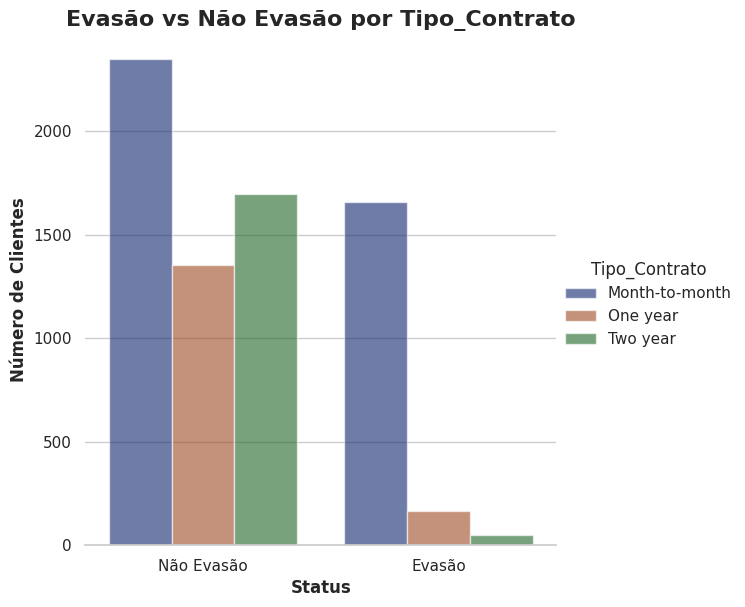

**📊 Análise Detalhada: Evasão por Tipo de Contrato**

**Observações**:

- Clientes com contrato Month-to-month (mensal):

  - Representam a maior parte dos clientes que cancelam os serviços (evasão).

  - Também são numerosos entre os clientes que permanecem (não evasão), indicando que esse tipo de contrato é o mais comum.

- Clientes com contrato One year (anual):

  - Apresentam baixo volume de evasão.

  - O número de clientes que permanecem é considerável, o que mostra maior estabilidade em relação ao plano mensal.

- Clientes com contrato Two year (bienal):

  - São os que menos cancelam os serviços.

  - A maioria permanece, indicando que contratos de longo prazo promovem fidelização.

**Insights identificados:**

- Há uma clara correlação negativa entre o tempo de contrato e a evasão: quanto maior a duração do contrato, menor a taxa de cancelamento.

- Clientes com contratos mensais têm mais liberdade para sair, o que os torna mais vulneráveis a ações da concorrência ou insatisfação com o serviço.

#### **Pelo tipo de Pagamento**

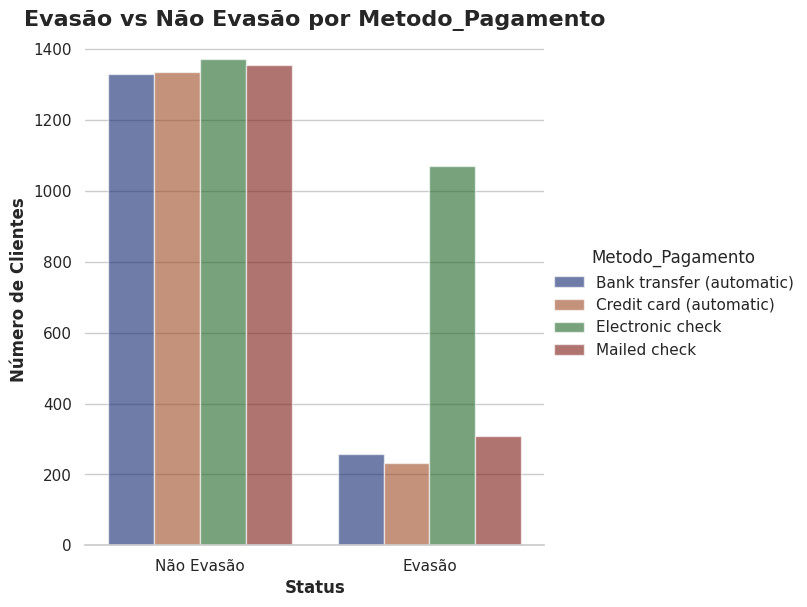

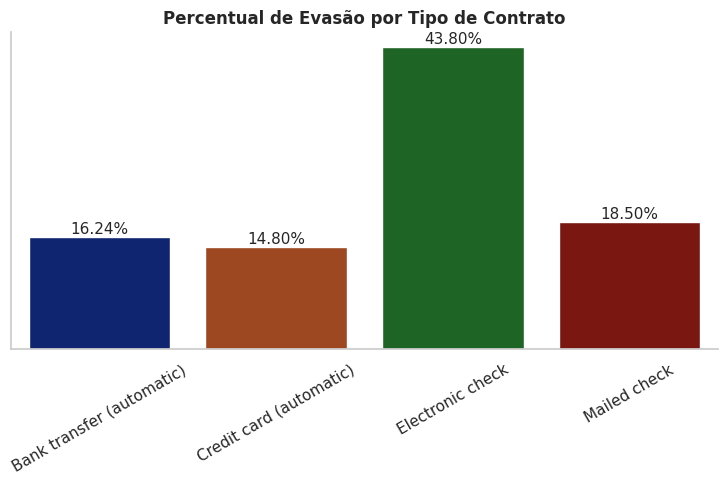

**📊 Análise Detalhada: Evasão pelo Método de Pagamento**

**Observações**:

- Clientes que utilizam electronic check (um método de pagamento manual) apresentam taxas significativamente mais altas de evasão comparados aos métodos automáticos como bank transfer e credit card.

- Os métodos bank transfer (automatic) e credit card (automatic) têm as menores taxas de evasão.

- Clientes que escolhem electronic check ou mailed check podem pertencer a segmentos com:

    - Menor renda ou sensibilidade ao custo,

    - Menor adesão à tecnologia,

    - Ou que estão apenas testando o serviço.

- Métodos não automáticos aumentam a probabilidade de falhas, esquecimentos ou atrasos, o que pode resultar em descontinuidade involuntária dos serviços e frustração.

**Insights identificados:**

- A ausência de automação pode representar uma barreira de conveniência, aumentando o risco de churn.

- Automação do pagamento favorece a retenção, pois reduz o atrito com a cobrança mensal e diminui a chance do cliente repensar sua permanência.

- O tipo de pagamento pode funcionar como um indicador de risco de churn, útil para segmentação e campanhas preventivas.

- Clientes que evadem por erro no pagamento não necessariamente estão insatisfeitos com o serviço, mas sim com o processo de cobrança.

### **Análise da Evasão Pelas Variáveis Númericas**

#### **Pelos Meses de Contrato**

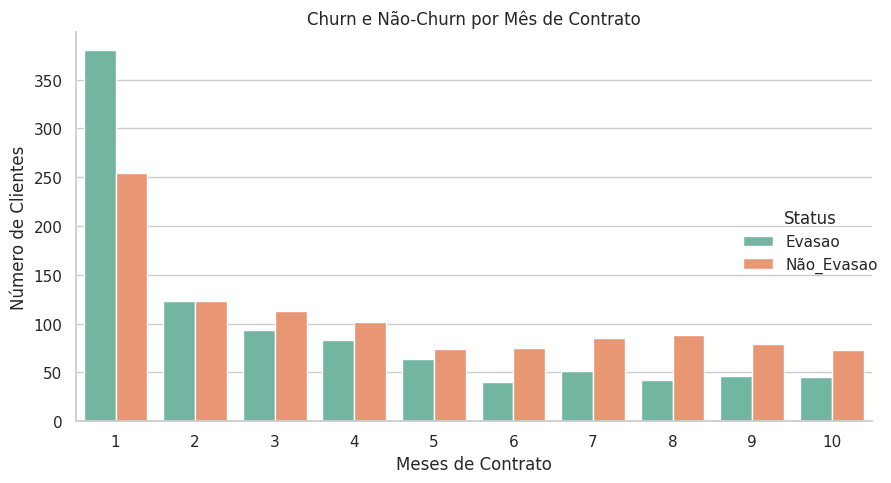

**📊 Análise Detalhada: Evasão pelos Meses de Contrato**

**Observações:**

1.   A evasão(churn) ocorre muito mais no início do ciclo de contrato, especialmente no 1º mês.
2.   Com o tempo, há diminuição gradual nos casos de evasões(churn).
3.   Quanto maior o tempo de contrato, mais clientes permanecem.

**Insights identificados:**

- A análise da variável Meses_Contrato mostra que a evasão de clientes é significativamente maior nos primeiros meses do contrato, especialmente no 1º mês;

- Indica uma fragilidade crítica na fase inicial do relacionamento com o cliente. A maioria dos cancelamentos ocorre entre o 1º e o 10º mês;

- Estratégias de retenção devem focar nos clientes que estão no início do ciclo contratual, especialmente no primeiro trimestre. Ao mesmo tempo, clientes com mais tempo de casa demonstram maior fidelidade, reforçando a importância de políticas de onboarding e engajamento precoce.


#### **Pelo Gasto Total**

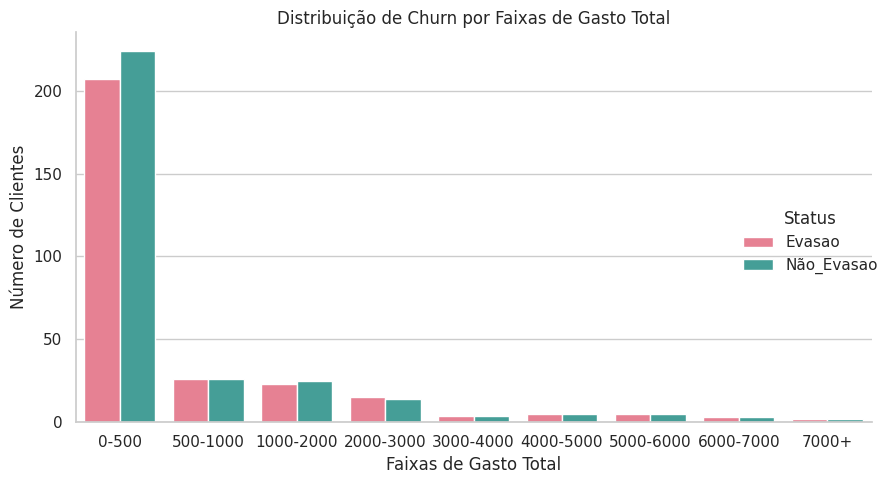

**📊 Análise Detalhada: Evasão pelo Gasto Total**

**Observações:**

1.   A evasão(churn) ocorre muito mais em clientes com baixo gasto total, isto é, clientes que apresentam um gasto total abaixo de 500;
2.   Com o aumento do gasto total, há diminuição gradual nos casos de evasões(churn);
3.   Quanto maior o Gasto total, mais clientes permanecem mostrando fidelidade.

**Insights identificados:**

- A análise da variável Gasto total mostra que a evasão de clientes é significativamente maior nos clientes que possuem baixo valor de Gasto total, especialmente aos que tem Gasto total menor que 500;

- A maioria dos cancelamentos ocorre entre os clientes com gasto total menor que 2000;

#### **Pelo Gasto Diário**

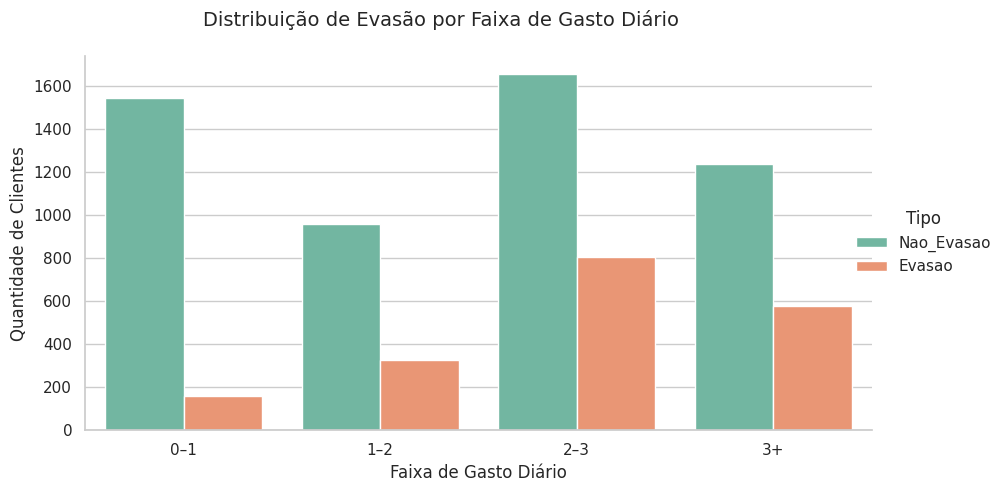

**📊 Análise Detalhada: Evasão pelo Gasto Diário**


**Observações:**


🟩 **Faixa 0-1**

*   Alta quantidade de clientes que permanecem (Não_Evasao)
*   Pouquíssima evasão

🟨 **Faixa 1-2**

*   A evasão começa a subir gradualmente, enquanto a permanência diminui

🟥 **Faixa 2-3**

*   Maior número de evasões
*   Número de permanências ainda é alto, mas proporcionalmente, a taxa de churn está mais elevada

🟦 **Faixa 3+ (maiores gastos)**

*   Número de evasões reduz novamente

**Insights identificados:**

- 🟩 **Faixa 0-1**: Clientes que gastam pouco tendem a permanecer mais. Pode ser que sejam usuários mais cautelosos ou que não exigem muito do serviço.

- 🟨 **Faixa 1-2**: Clientes que aumentam o gasto normalmente podem estar testando mais o serviço, mas nem todos veem valor suficiente para continuar, resultando em maior evasão.

- 🟥 **Faixa 2-3**: Essa pode ser a faixa crítica - clientes que gastam mais e esperam retorno proporcional. Quando isso não acontece, abandonam o serviço.

- 🟦 **Faixa 3+ (maiores gastos)**: Clientes que gastam mais talvez sejam usuários fiéis, clientes premium ou tenham maior dependência do serviço. Isso reduz a chance de churn.

#### **Pela quantidade de serviços Contratados**

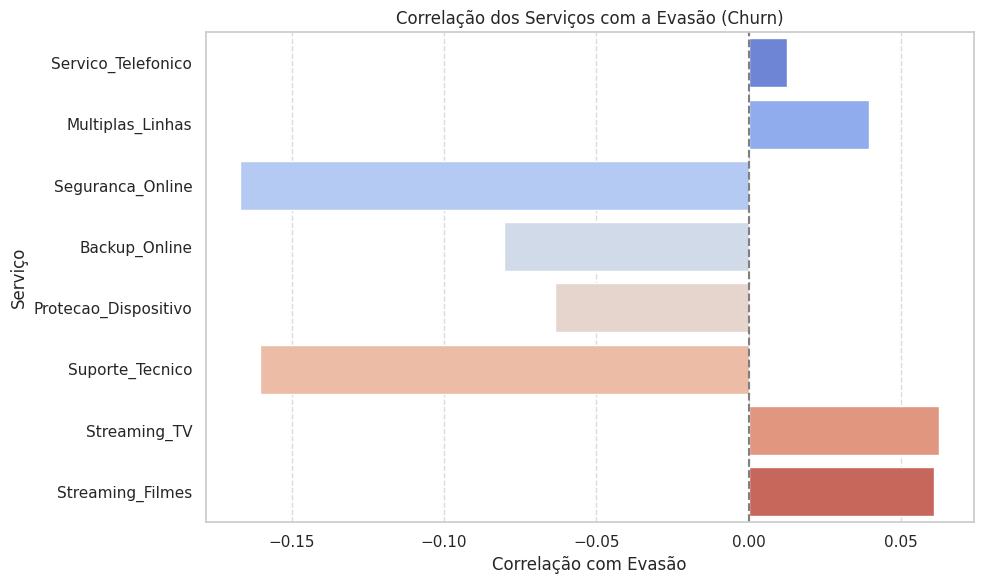

**📊 Análise Detalhada da Correlação: Evasão pela quantidade de serviços contratados**

*   **Correlação positiva**: indica que clientes que usam o serviço têm maior probabilidade de evasão.
*  **Correlação negativa**: indica que clientes que usam o serviço têm menor probabilidade de evasão.
*   Valores próximos de 0 indicam correlação fraca ou inexistente.

📉 **Serviços com correlação negativa (menor risco de churn)**

*   **Segurança Online**: -0.167 -> Clientes que usam esse serviço tendem a ficar mais.
*   **Suporte Técnico**: -0.160 -> Ter suporte técnico disponível reduz a evasão.
*   **Backup Online**: -0.080 -> Também associado a menor evasão.
*   **Proteção de Dispositivo**: -0.063 -> Leve tendência de retenção de clientes.

Esses serviços parecem agregar valor percebido, o que reduz o churn.

📈 **Serviços com correlação positiva (maior risco de churn)**

*   **Múltiplas Linhas**: +0.039
*   **Streaming TV**: +0.062
*   **Streaming de Filmes**: +0.061

Leve associação com maior evasão, possivelmente por baixa percepção de valor ou custo elevado.

⚠️ **Serviços com correlação neutra**
*   **Serviço Telefônico**: +0.013 -> Praticamente sem influência significativa sobre o churn.

**Insights identificados:**

- Suporte_Tecnico e Seguranca_Online são os serviços que mais reduzem o churn (embora de forma ainda fraca).

- Serviços de entretenimento como Streaming_TV e Streaming_Filmes parecem ter uma ligação leve com maior evasão, talvez por serem adicionais não essenciais.

- Serviços básicos, como Serviço Telefônico, não impactam o churn - os clientes tendem a mantê-los ou cancelar por outros fatores.













## **Recomendações**

### **Da Análise por Gênero**

1. Evitar segmentações baseadas em gênero nas ações de retenção

    - Não há justificativa analítica para campanhas distintas por gênero, ao menos com base nos dados atuais.

2. Focar em variáveis mais explicativas

  - Redirecionar esforços analíticos para entender fatores como:

    - Tipo de contrato (mensal vs anual)

    - Perfil de consumo (clientes com muitos serviços x poucos)

    - Valor pago mensalmente

3. Utilizar o gênero apenas como variável de controle (e não principal)

  - Ele pode ser mantido no modelo de análise, mas com peso reduzido.

### **Da Análise por Tipo de Contrato**

1. Incentivar contratos de longo prazo:

  - Criar promoções e benefícios (como desconto na mensalidade, bônus de internet, etc.) para migrar clientes do plano mensal para o anual ou bienal.

2. Monitorar de perto os clientes com contratos mensais:

  - Aplicar campanhas de retenção personalizadas para esse grupo.

  - Oferecer atendimento proativo e benefícios para renovação.

3. Realizar campanhas de educação do cliente:

  - Esclarecer as vantagens financeiras e de estabilidade dos contratos mais longos.

4. Utilizar esse padrão no modelo preditivo de churn:

  - O tipo de contrato é um forte preditor de evasão e deve ser tratado com prioridade no modelo de machine learning.

### **Da Análise pelo Método de Pagamento**

1. Incentivar a troca de método de pagamento:

  - Campanhas com Descontos;

  - Integrações simplificadas para facilitar a troca no app ou portal.

2. Monitorar e priorizar o suporte para clientes com electronic check:

  - Enviar lembretes antes da cobrança.

  - Propor plano de fidelização se o cliente estiver há mais de 3 meses na base.

3. Educar o cliente:

  - Mostrar os benefícios da automação (conveniência, segurança, evitar interrupções).

  - Inserir no onboarding boas práticas de pagamento.



### **Da Análise pelos Meses de contrato**

1. Melhoria no processo de onboarding
  - Criar um programa de boas-vindas estruturado com vídeos explicativos, suporte personalizado e acompanhamento no 1º mês.

2. Pesquisas de satisfação antecipadas
  - Aplicar pesquisas rápidas após a 1ª semana e no final do 1º mês para detectar possíveis insatisfações precoces.

3. Incentivos nos primeiros 3 meses
  - Oferecer benefícios de retenção (como descontos progressivos ou funcionalidades extras) para incentivar a permanência até o 4º mês.

4. Monitoramento proativo nos meses críticos
  - Focar no 2º e 3º mês, que são momentos decisivos na curva de evasão, com intervenções personalizadas para clientes em risco.

5. Estudo do perfil de clientes fiéis
  - Analisar o comportamento, perfil e jornada dos clientes que permanecem por mais de 6 meses, para replicar estratégias bem-sucedidas.

### **Da Análise do Gasto Total**

1. Criar estratégias para retenção de clientes de baixo gasto

  - Oferecer planos personalizados, comunicação mais próxima ou pacotes com mais valor agregado para clientes da faixa 0-500.

  - Incentivar a migração para faixas superiores, com upselling ou benefícios escalonados.

2. Identificar motivos de evasão precoce

  - Realizar pesquisas ou entrevistas com clientes da faixa de 0-500 que evadiram, para entender suas motivações e ajustar a oferta.

3. Valorizar e fidelizar clientes de alto valor

  - Criar programas de fidelidade ou exclusividade para clientes com gasto acima de R$ 1000.

  - Esses clientes são mais propensos a permanecer e podem se tornar advogados da marca.

4. Segmentar campanhas com base no potencial de gasto

  - Usar essa análise para criar perfis comportamentais e segmentar os clientes com maior risco de churn, especialmente na base.

### **Da Análise do Gasto Diário**

1. Churn não é linear com o gasto: Ele cresce até certo ponto e depois diminui, formando uma curva semelhante a um "arco".

2. Clientes com gasto médio (2–3) merecem atenção especial — talvez estejam decepcionados com o valor entregue.

3. Clientes de alto gasto (3+) devem ser priorizados para retenção: já investem bastante e têm boa chance de fidelização.

4. Segmentação e personalização por faixa de gasto pode aumentar retenção e satisfação.

### **Da Análise da Quantidade de serviços contratados**

1. Incentivar o uso de serviços como Segurança Online, Suporte Técnico e Backup (oferecendo em pacotes, promoções ou planos combinados).

2. Reavaliar a estratégia de valor ou comunicação dos serviços com correlação positiva, como Streaming, para entender por que esses usuários estão saindo.